In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

In [6]:
df_coupon = pd.read_csv("DB1BCoupon_2022_1.csv")
df_ticket = pd.read_csv("DB1BTicket_2022_1.csv")
df_market = pd.read_csv("DB1BMarket_2022_1.csv")
# df_oil = pd.read_csv("Cushing_OK_WTI_Spot_Price_FOB_Monthly.csv")
df_covid = pd.read_csv("owid-covid-data.csv")

In [7]:
df_coupon.head()

,ItinID,MktID,SeqNum,Coupons,Year,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Quarter,Origin,...,OpCarrier,RPCarrier,Passengers,FareClass,Distance,DistanceGroup,Gateway,ItinGeoType,CouponGeoType,Unnamed: 36
0,2022135300,202213530001,1,4,2022,11308,1130802,31308,1,DHN,...,9E,9E,1.0,X,170.0,1,0.0,2,2,NaN
1,2022175242,202217524201,1,4,2022,13795,1379502,33795,1,OAJ,...,9E,9E,1.0,X,399.0,1,0.0,2,2,NaN
2,20221903191,2022190319101,1,4,2022,14908,1490803,32575,1,SNA,...,AA,AA,1.0,X,1205.0,3,0.0,2,2,NaN
3,20221709803,2022170980301,1,4,2022,14057,1405702,34057,1,PDX,...,AA,AA,1.0,X,1616.0,4,0.0,2,2,NaN
4,20221935950,2022193595001,1,4,2022,15304,1530402,33195,1,TPA,...,AA,AA,1.0,D,929.0,2,0.0,2,2,NaN


In [8]:
df_ticket.head()

,ItinID,Coupons,Year,Quarter,Origin,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCountry,OriginStateFips,...,FarePerMile,RPCarrier,Passengers,ItinFare,BulkFare,Distance,DistanceGroup,MilesFlown,ItinGeoType,Unnamed: 25
0,202213686946,2,2022,1,ATL,10397,1039707,30397,US,13,...,0.0022,WN,1.0,5.0,0.0,2294.0,5,2294.0,2,NaN
1,202213686835,2,2022,1,ATL,10397,1039707,30397,US,13,...,0.0022,WN,3.0,5.0,0.0,2310.0,5,2310.0,2,NaN
2,202213686820,2,2022,1,ATL,10397,1039707,30397,US,13,...,0.0025,WN,2.0,5.0,0.0,2039.0,5,2039.0,2,NaN
3,202213687614,2,2022,1,ATL,10397,1039707,30397,US,13,...,0.0055,WN,1.0,5.0,0.0,914.0,2,914.0,2,NaN
4,202213687602,2,2022,1,ATL,10397,1039707,30397,US,13,...,0.0056,WN,2.0,5.0,0.0,891.0,2,891.0,2,NaN


In [9]:
df_market.head()

,ItinID,MktID,MktCoupons,Year,Quarter,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCountry,...,BulkFare,Passengers,MktFare,MktDistance,MktDistanceGroup,MktMilesFlown,NonStopMiles,ItinGeoType,MktGeoType,Unnamed: 41
0,202212996774,20221299677402,1,2022,1,14576,1457606,34576,ROC,US,...,0.0,1.0,119.0,343.0,1,343.0,343.0,2,2,NaN
1,202212996775,20221299677501,1,2022,1,10721,1072102,30721,BOS,US,...,0.0,1.0,122.5,343.0,1,343.0,343.0,2,2,NaN
2,202212996775,20221299677502,1,2022,1,14576,1457606,34576,ROC,US,...,0.0,1.0,122.5,343.0,1,343.0,343.0,2,2,NaN
3,202212996776,20221299677601,1,2022,1,10721,1072102,30721,BOS,US,...,0.0,1.0,123.0,343.0,1,343.0,343.0,2,2,NaN
4,202212996776,20221299677602,1,2022,1,14576,1457606,34576,ROC,US,...,0.0,1.0,123.0,343.0,1,343.0,343.0,2,2,NaN


In [10]:
df_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


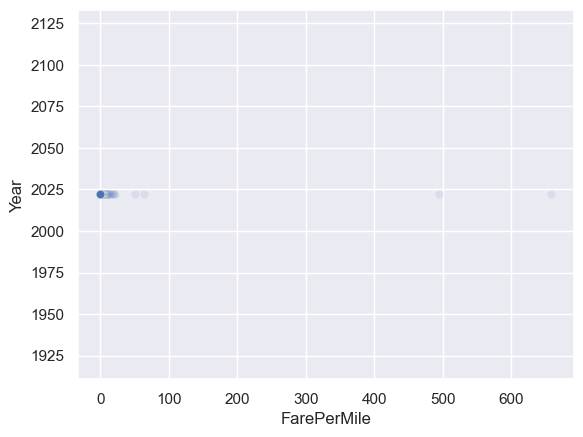

In [16]:
sns.scatterplot(x=df_ticket["FarePerMile"], y=df_ticket["Year"], alpha=0.1);